<a href="https://colab.research.google.com/github/reeennico/Processamento-Digital-de-Sinais/blob/main/Cap_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 5: Transformada Discreta de Fourier (DFT)

## Resumo

A Transformada Discreta de Fourier (DFT) é uma ferramenta essencial para a análise e o processamento de sinais discretos. Ela converte um sinal do domínio do tempo para o domínio da frequência, permitindo a identificação de seus componentes espectrais. A DFT é amplamente utilizada em aplicações como compressão de sinais, filtragem digital e análise espectral.

Diferente da Transformada de Fourier de Tempo Discreto (DTFT), que fornece uma representação contínua no domínio da frequência, a DFT gera uma versão discreta e finita, viabilizando sua implementação computacional.

---

## 1. Definição da DFT

A DFT de uma sequência discreta de comprimento $$ N $$, representada por $$ x(n) $$, é definida por:

$$
X(k) = \sum_{n=0}^{N-1} x(n) e^{-j 2\pi kn/N}, \quad k = 0, 1, ..., N-1
$$

Essa equação transforma um sinal discreto no tempo \( x(n) \) em uma representação discreta no domínio da frequência \( X(k) \), onde \( k \) indica os índices de frequência igualmente espaçados.

A reconstrução do sinal original a partir de \( X(k) \) é feita por meio da Transformada Discreta de Fourier Inversa (IDFT), definida por:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) e^{j 2\pi kn/N}
$$

---

### Implementação em Python:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sinal de entrada
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

x = np.array([1, 2, 3, 4])  # Exemplo de sequência discreta
X = dft(x)
print("DFT:", X)

DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


## 2. Propriedades da DFT

A Transformada Discreta de Fourier (DFT) possui diversas propriedades úteis que tornam a análise e manipulação de sinais mais eficiente:

- **Periodicidade**: O espectro \(X(k)\) gerado pela DFT é periódico com período \(N\), ou seja, \(X(k + N) = X(k)\).
- **Simetria Hermitiana**: Se a sequência \(x(n)\) for composta por valores reais, os coeficientes da DFT seguirão a relação \(X(N-k) = X^*(k)\), onde \(*\) representa o conjugado complexo.
- **Linearidade**: A DFT de uma soma de sinais é igual à soma das DFTs individuais, ou seja, se \(y(n) = a x_1(n) + b x_2(n)\), então \(Y(k) = a X_1(k) + b X_2(k)\).
- **Teorema da Convolução**: A convolução de duas sequências no tempo equivale à multiplicação de suas DFTs no domínio da frequência, facilitando o processamento de sinais.

Essas propriedades são amplamente exploradas em aplicações de filtragem, compressão de dados e análise espectral.

---

### Implementação em Python:

In [ ]:
# Verificação da periodicidade
N = 8
n = np.arange(N)
k = np.arange(N)
X = np.exp(-2j * np.pi * k[:, None] * n / N)  # Matriz de transformação

# Exibir matriz de forma formatada
np.set_printoptions(precision=2, suppress=True, linewidth=100)
print("Matriz de DFT:")
for row in X:
    print(" ".join(f"{val.real:.2f} + {val.imag:.2f}j" for val in row))

Matriz de DFT:
1.00 + 0.00j 1.00 + 0.00j 1.00 + 0.00j 1.00 + 0.00j 1.00 + 0.00j 1.00 + 0.00j 1.00 + 0.00j 1.00 + 0.00j
1.00 + 0.00j 0.71 + -0.71j 0.00 + -1.00j -0.71 + -0.71j -1.00 + -0.00j -0.71 + 0.71j -0.00 + 1.00j 0.71 + 0.71j
1.00 + 0.00j 0.00 + -1.00j -1.00 + -0.00j -0.00 + 1.00j 1.00 + 0.00j 0.00 + -1.00j -1.00 + -0.00j -0.00 + 1.00j
1.00 + 0.00j -0.71 + -0.71j -0.00 + 1.00j 0.71 + -0.71j -1.00 + -0.00j 0.71 + 0.71j 0.00 + -1.00j -0.71 + 0.71j
1.00 + 0.00j -1.00 + -0.00j 1.00 + 0.00j -1.00 + -0.00j 1.00 + 0.00j -1.00 + -0.00j 1.00 + 0.00j -1.00 + -0.00j
1.00 + 0.00j -0.71 + 0.71j 0.00 + -1.00j 0.71 + 0.71j -1.00 + -0.00j 0.71 + -0.71j -0.00 + 1.00j -0.71 + -0.71j
1.00 + 0.00j -0.00 + 1.00j -1.00 + -0.00j 0.00 + -1.00j 1.00 + 0.00j -0.00 + 1.00j -1.00 + -0.00j -0.00 + -1.00j
1.00 + 0.00j 0.71 + 0.71j -0.00 + 1.00j -0.71 + 0.71j -1.00 + -0.00j -0.71 + -0.71j -0.00 + -1.00j 0.71 + -0.71j


## 3. A Transformada Rápida de Fourier (FFT)

A Transformada Rápida de Fourier (FFT) é um algoritmo otimizado para calcular a DFT de maneira eficiente, reduzindo o número de operações necessárias. Enquanto a DFT direta possui uma complexidade computacional de $$O(N^2)$$, a FFT reduz esse custo para $$O(N \log N)$$, tornando viável a análise de sinais longos.

Esse ganho de eficiência é obtido explorando duas propriedades fundamentais da DFT:
- **Divisão e conquista**: O problema é recursivamente dividido em subproblemas menores, facilitando a computação.
- **Simetria e periodicidade**: Os coeficientes da DFT possuem padrões repetitivos que podem ser reutilizados, evitando cálculos desnecessários.

A FFT é amplamente utilizada em aplicações como compressão de áudio e imagem, análise espectral e processamento de sinais em tempo real.

---

### Implementação em Python:

In [ ]:
# Uso da FFT para calcular a DFT
def fft_example():
    x = np.random.rand(8)  # Sinal aleatório
    X_dft = dft(x)  # Cálculo usando DFT direta
    X_fft = np.fft.fft(x)  # Cálculo usando FFT
    print("DFT direta:", X_dft)
    print("FFT:", X_fft)

fft_example()

DFT direta: [ 4.71897199+0.00000000e+00j -0.46573697-1.60644415e-01j
 -0.27822086+5.17358348e-01j -0.42845265-4.93039267e-01j
  1.49208168+5.84731518e-16j -0.42845265+4.93039267e-01j
 -0.27822086-5.17358348e-01j -0.46573697+1.60644415e-01j]
FFT: [ 4.71897199+0.j         -0.46573697-0.16064442j -0.27822086+0.51735835j
 -0.42845265-0.49303927j  1.49208168+0.j         -0.42845265+0.49303927j
 -0.27822086-0.51735835j -0.46573697+0.16064442j]


## 4. Aplicação: Filtragem no Domínio da Frequência

A DFT permite a manipulação de sinais no domínio da frequência, tornando possível a remoção ou atenuação de componentes indesejados. O processo básico de filtragem envolve os seguintes passos:

1. **Aplicação da DFT**: O sinal no domínio do tempo é transformado para o domínio da frequência.
2. **Modificação do espectro**: Componentes de frequência específicas podem ser atenuadas ou realçadas conforme necessário.
3. **Transformada Inversa (IDFT ou IFFT)**: O sinal filtrado é reconstruído no domínio do tempo.

Esse método é amplamente utilizado em áreas como processamento de áudio, remoção de ruídos em imagens e comunicações digitais.


---

### Implementação em Python:

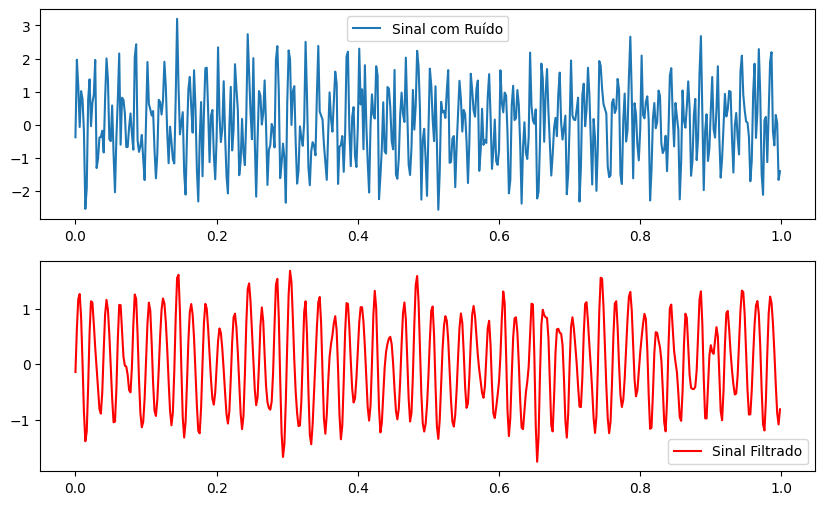

In [ ]:
# Criando um sinal com ruído
t = np.linspace(0, 1, 500, endpoint=False)
sinal_puro = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
ruido = 0.5 * np.random.randn(500)
sinal_noisy = sinal_puro + ruido

# Aplicando a FFT
X = np.fft.fft(sinal_noisy)
freqs = np.fft.fftfreq(len(t), d=1/500)

# Filtragem - Removendo frequências acima de 100Hz
X[np.abs(freqs) > 100] = 0
sinal_filtrado = np.fft.ifft(X)

# Plotando os sinais
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, sinal_noisy, label='Sinal com Ruído')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, sinal_filtrado.real, label='Sinal Filtrado', color='r')
plt.legend()
plt.show()

## Conclusão

A Transformada Discreta de Fourier (DFT) desempenha um papel fundamental na análise de sinais discretos, permitindo converter informações do domínio do tempo para o domínio da frequência. Essa conversão possibilita a identificação e manipulação de componentes espectrais, sendo útil em diversas aplicações, como filtragem, compressão e análise de espectro.

Com a introdução da Transformada Rápida de Fourier (FFT), o cálculo da DFT se tornou muito mais eficiente, reduzindo significativamente o tempo de processamento. Isso viabilizou o uso da DFT em tempo real para aplicações como processamento de áudio, telecomunicações e visão computacional.

O estudo da DFT e da FFT é essencial para quem trabalha com processamento digital de sinais (DSP), pois fornece as ferramentas necessárias para compreender e modificar sinais de maneira eficaz.

